In [2]:
from subprocess import run

In [90]:
initPath = '/Users/arinafedotova/Downloads/InitialAge.csv'
deathPath = '/Users/arinafedotova/Downloads/DeathRules.csv'
startYear = "1970"
endYear = "2000"
populationBegin = "130000000"


In [94]:
run(['/Users/arinafedotova/RiderProjects/Demographic/Exec/bin/Debug/net7.0/Exec', 
    initPath,
    deathPath,
    startYear, endYear, populationBegin])

InitialAge
[0, 16],[2, 66],[6, 82],[11, 82],[16, 82],[21, 80],[26, 78],[31, 76],[36, 74],[41, 70],[46, 64],[51, 58],[56, 50],[61, 40],[66, 32],[71, 22],[76, 14],[81, 8],[91, 6]
Init Start
Number of People in the begining: 130000
Init End
Model Start
Year: 1971, Died: 12106, Born: 3716
Year: 1972, Died: 8666, Born: 4266
Year: 1973, Died: 6978, Born: 4123
Year: 1974, Died: 61, Born: 3932
Year: 1975, Died: 84, Born: 3466
Year: 1976, Died: 7625, Born: 3437
Year: 1977, Died: 6345, Born: 4026
Year: 1978, Died: 5198, Born: 3821
Year: 1979, Died: 79, Born: 3717
Year: 1980, Died: 144, Born: 3241
Year: 1981, Died: 5945, Born: 3285
Year: 1982, Died: 5034, Born: 3869
Year: 1983, Died: 4313, Born: 3778
Year: 1984, Died: 154, Born: 3624
Year: 1985, Died: 309, Born: 3058
Year: 1986, Died: 5189, Born: 3870
Year: 1987, Died: 4533, Born: 3621
Year: 1988, Died: 3804, Born: 3682
Year: 1989, Died: 332, Born: 3677
Year: 1990, Died: 643, Born: 3737
Year: 1991, Died: 4617, Born: 4025
Year: 1992, Died: 4190, B

CompletedProcess(args=['/Users/arinafedotova/RiderProjects/Demographic/Exec/bin/Debug/net7.0/Exec', '/Users/arinafedotova/Downloads/InitialAge.csv', '/Users/arinafedotova/Downloads/DeathRules.csv', '1970', '2000', '130000000'], returncode=0)

график изменения общего населения по годам в виде spline chart;  
график изменения населения мужского пола по годам в виде spline chart;  
график изменения населения женского пола по годам в виде spline chart;  
возрастной состав населения мужского пола на конец моделирования для возрастных категорий 0-18, 19-45, 45-65 и 65-100 лет в виде bar chart;  
возрастной состав населения женского пола на конец моделирования для возрастных категорий 0-18, 19-44, 45-65 и 66-100 лет в виде bar chart.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

In [95]:
fYearPop = pd.read_csv('YearPopulationFile.csv')

In [96]:
fYearPop.head()

,Year,Population,Men,Women
0,1970,130000,65000,65000
1,1971,133716,60262,61348
2,1972,125876,57648,59562
3,1973,121333,55957,58398
4,1974,118287,57696,60530


In [97]:
x = np.array(fYearPop['Year'])
y = np.array(fYearPop['Population'])
yM = np.array(fYearPop['Men'])
yF = np.array(fYearPop['Women'])

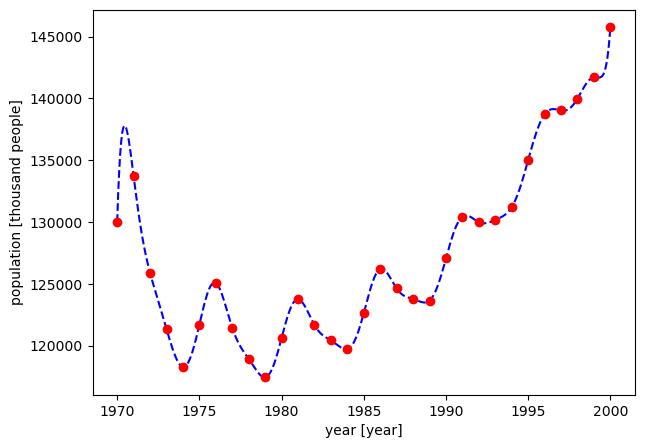

In [98]:
xnew = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=7) 
ynew = spl(xnew)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xnew, ynew, '--', color='blue')

ax.plot(x, y, 'o', color='red')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.show()

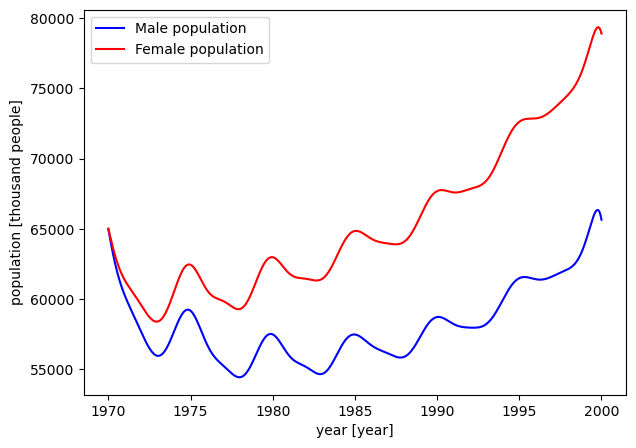

In [99]:
xnew = np.linspace(x.min(), x.max(), 500)
splM = make_interp_spline(x, yM, k=7) 
ynewM = splM(xnew)

splF = make_interp_spline(x, yF, k=7)  
ynewF = splF(xnew)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xnew, ynewM, color='blue', label='Male population')

ax.plot(xnew, ynewF, color='red', label='Female population')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.legend()
plt.show()

In [100]:
fAgePop = pd.read_csv('AgePopulation.csv')
fAgePop.head()

,Age,Population,Men,Women
0,0-18,76860,34676,42184
1,19-44,55084,25288,29796
2,45-64,11703,5366,6337
3,65-100,896,318,578


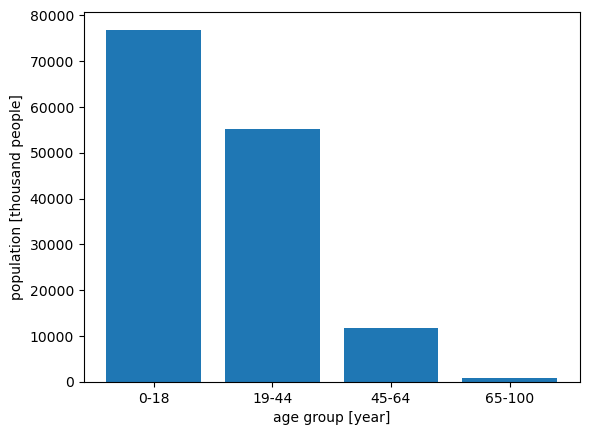

In [101]:
plt.bar(fAgePop["Age"], fAgePop["Population"])

plt.xlabel('age group [year]')
plt.ylabel('population [thousand people]')
plt.show()

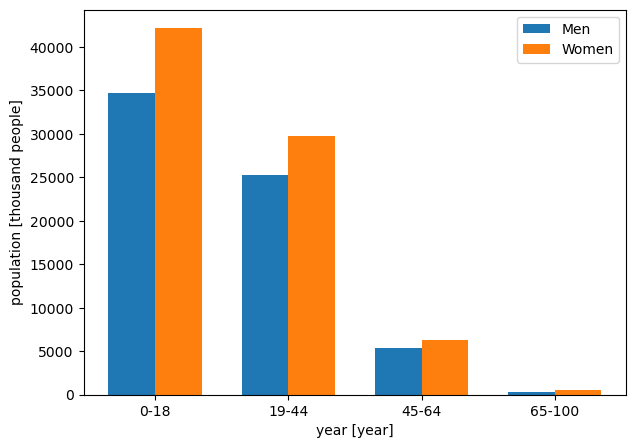

In [102]:
fig, ax = plt.subplots(figsize=(7, 5))
bar_width = 0.35
index = np.arange(len(fAgePop["Age"]))

ax.bar(index, fAgePop["Men"], bar_width, label='Men')

ax.bar(index+bar_width, fAgePop["Women"], bar_width, label='Women')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.xticks(index + bar_width/2, fAgePop["Age"])
plt.legend()
plt.show()